In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

df_train = pd.read_csv('google_review_ratings.csv')

In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [3]:
df_train.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [4]:
df_train

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,1.02,1.06,1.29,1.29,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,1.01,1.04,1.27,1.27,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,0.99,1.00,1.08,1.25,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,0.97,0.98,1.06,1.23,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,NaN


# Preprocessing
* Remove unused column: ['Unnamed: 25']
* Remove unaligned row: [1347, 2712]
* Data type casting
* Column rename

In [5]:
df_train = df_train.drop(['Unnamed: 25'], axis=1)
df_train

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,1.02,1.06,1.29,1.29,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,1.01,1.04,1.27,1.27,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,0.99,1.00,1.08,1.25,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,0.97,0.98,1.06,1.23,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


In [6]:
df_train.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.078339,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.249208,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,2.285000,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
df_train = df_train.drop([1347, 2712])
df_train['Category 11'] = pd.to_numeric(df_train['Category 11'])
df_train

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,1.02,1.06,1.29,1.29,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,1.01,1.04,1.27,1.27,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,0.99,1.00,1.08,1.25,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,0.97,0.98,1.06,1.23,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


In [8]:
new_name = ['UserId', 'Church', 'Resorts', 'Beaches', 'Parks', 
            'Theatres', 'Museums', 'Malls', 'Zoo', 'Restaurants',
            'Pubs_Bars', 'Local_Services', 'Burger_Pizza', 'Hotel_Lodgings', 'Juice_Bars',
            'Art_Galleries', 'Dance_clubs', 'Swimming_Pools', 'Gyms', 'Bakeries',
            'Beauty_Spas', 'Cafes', 'ViewPoints', 'Monuments', 'Gardens']
df_train.columns = new_name

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5454 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UserId          5454 non-null   object 
 1   Church          5454 non-null   float64
 2   Resorts         5454 non-null   float64
 3   Beaches         5454 non-null   float64
 4   Parks           5454 non-null   float64
 5   Theatres        5454 non-null   float64
 6   Museums         5454 non-null   float64
 7   Malls           5454 non-null   float64
 8   Zoo             5454 non-null   float64
 9   Restaurants     5454 non-null   float64
 10  Pubs_Bars       5454 non-null   float64
 11  Local_Services  5454 non-null   float64
 12  Burger_Pizza    5454 non-null   float64
 13  Hotel_Lodgings  5454 non-null   float64
 14  Juice_Bars      5454 non-null   float64
 15  Art_Galleries   5454 non-null   float64
 16  Dance_clubs     5454 non-null   float64
 17  Swimming_Pools  5454 non-null   f

In [10]:
df_train.describe()

,Church,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Pubs_Bars,Local_Services,Burger_Pizza,Hotel_Lodgings,Juice_Bars,Art_Galleries,Dance_clubs,Swimming_Pools,Gyms,Bakeries,Beauty_Spas,Cafes,ViewPoints,Monuments,Gardens
count,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000
mean,1.455746,2.320048,2.489059,2.797103,2.958904,2.893423,3.351476,2.541177,3.126542,2.832695,2.549622,2.078401,2.125820,2.190429,2.206140,1.192710,0.949349,0.822525,0.969250,0.999626,0.965275,1.749345,1.531051,1.560570
std,0.827732,1.421576,1.247503,1.309188,1.338785,1.282101,1.413291,1.111398,1.356774,1.307299,1.381498,1.249315,1.406682,1.576505,1.715848,1.107176,0.973628,0.948015,1.202883,1.193129,0.928326,1.597816,1.316180,1.171784
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.110000,1.120000,0.860000,0.840000,0.810000,0.780000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.790000,1.930000,1.620000,1.800000,1.640000,1.580000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.910000,2.060000,2.460000,2.670000,2.680000,3.230000,2.170000,2.800000,2.680000,2.000000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.687500,2.740000,4.097500,4.310000,3.837500,5.000000,3.190000,5.000000,3.527500,3.217500,2.287500,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
df_train

,UserId,Church,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Pubs_Bars,Local_Services,Burger_Pizza,Hotel_Lodgings,Juice_Bars,Art_Galleries,Dance_clubs,Swimming_Pools,Gyms,Bakeries,Beauty_Spas,Cafes,ViewPoints,Monuments,Gardens
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,1.02,1.06,1.29,1.29,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,1.01,1.04,1.27,1.27,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,0.99,1.00,1.08,1.25,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,0.97,0.98,1.06,1.23,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


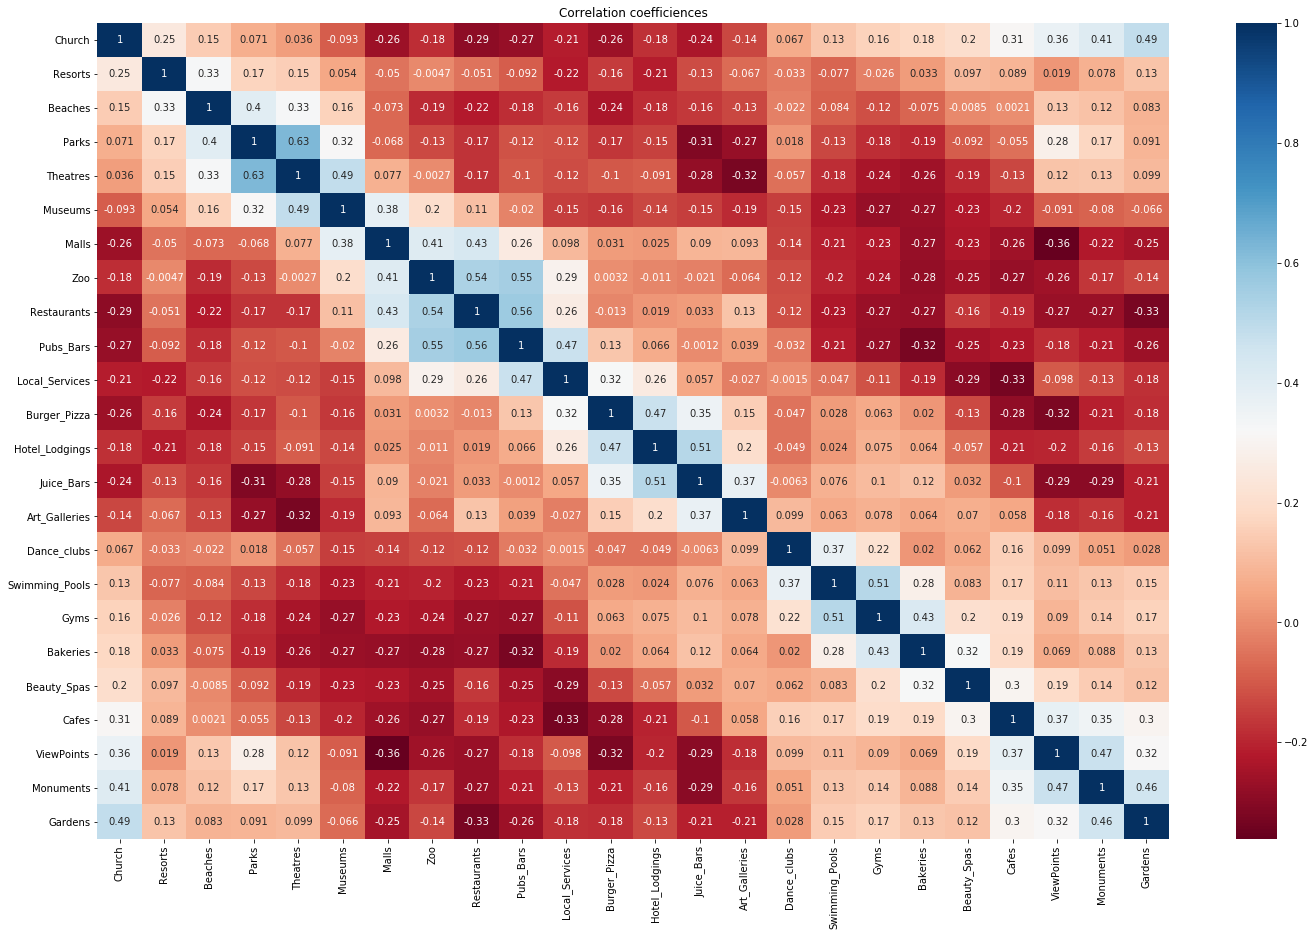

In [12]:
plt.figure(figsize=(24,15))
corr = df_train.corr()
plt.title('Correlation coefficiences')
sns.heatmap(corr, annot=True, cmap='RdBu')

## Preprocessing part 2
* Assume rating 0 as a outcome of no record rather than real rating
    * Delete rows with any rating 0
* Assume rating 5 as a outcome of few record average
    * Reluarize by minusing a constant 0.1 * (average of user rating in 24 categories)

In [13]:
df = df_train[~(df_train == 0).any(axis=1)]
df['Avg'] = df.drop('UserId', axis=1).apply(lambda x: x.mean(), axis=1)

df

C:\Users\user\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,UserId,Church,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Pubs_Bars,Local_Services,Burger_Pizza,Hotel_Lodgings,Juice_Bars,Art_Galleries,Dance_clubs,Swimming_Pools,Gyms,Bakeries,Beauty_Spas,Cafes,ViewPoints,Monuments,Gardens,Avg
68,User 69,0.83,0.78,0.82,0.85,3.85,5.00,2.93,2.92,2.82,2.83,2.06,1.46,1.35,1.31,1.33,1.35,0.55,0.58,0.53,0.50,0.75,0.73,0.72,0.73,1.565833
69,User 70,0.76,0.82,0.83,5.00,3.86,5.00,2.94,2.91,2.82,2.41,2.05,1.46,1.34,1.30,1.31,1.33,1.36,0.58,0.52,0.50,0.52,0.75,0.73,0.74,1.743333
70,User 71,0.77,0.83,0.84,0.86,3.87,5.00,5.00,2.91,2.81,2.81,2.04,1.44,1.29,1.29,1.30,1.32,1.34,0.58,0.52,0.51,0.53,0.76,0.74,0.77,1.672083
71,User 72,0.85,0.84,0.85,0.88,3.87,2.94,5.00,2.91,2.80,2.80,2.03,1.42,1.28,1.27,1.28,1.30,0.58,0.58,0.53,0.51,0.53,0.78,0.76,0.80,1.557917
72,User 73,0.80,0.86,0.87,0.90,3.88,5.00,2.92,2.90,2.79,2.79,2.01,1.42,1.30,1.26,1.27,1.29,0.57,0.59,0.53,0.52,0.53,5.00,0.77,0.88,1.735417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,1.02,1.06,1.29,1.29,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.00,5.00,1.56,2.262500
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,1.01,1.04,1.27,1.27,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.00,5.00,1.09,1.937083
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,0.99,1.00,1.08,1.25,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.00,5.00,1.11,2.029167
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,0.97,0.98,1.06,1.23,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.00,5.00,1.12,2.154167


In [14]:
df = df.apply(lambda x: x.apply(lambda y: 5-0.1*x['Avg'] if y == 5 else y), axis = 1)
df

,UserId,Church,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Pubs_Bars,Local_Services,Burger_Pizza,Hotel_Lodgings,Juice_Bars,Art_Galleries,Dance_clubs,Swimming_Pools,Gyms,Bakeries,Beauty_Spas,Cafes,ViewPoints,Monuments,Gardens,Avg
68,User 69,0.83,0.780000,0.820000,0.850000,3.85,4.843417,2.930000,2.92,2.82,2.83,2.06,1.46,1.35,1.31,1.330000,1.35,0.55,0.58,0.53,0.500000,0.75,0.730000,0.720000,0.73,1.565833
69,User 70,0.76,0.820000,0.830000,4.825667,3.86,4.825667,2.940000,2.91,2.82,2.41,2.05,1.46,1.34,1.30,1.310000,1.33,1.36,0.58,0.52,0.500000,0.52,0.750000,0.730000,0.74,1.743333
70,User 71,0.77,0.830000,0.840000,0.860000,3.87,4.832792,4.832792,2.91,2.81,2.81,2.04,1.44,1.29,1.29,1.300000,1.32,1.34,0.58,0.52,0.510000,0.53,0.760000,0.740000,0.77,1.672083
71,User 72,0.85,0.840000,0.850000,0.880000,3.87,2.940000,4.844208,2.91,2.80,2.80,2.03,1.42,1.28,1.27,1.280000,1.30,0.58,0.58,0.53,0.510000,0.53,0.780000,0.760000,0.80,1.557917
72,User 73,0.80,0.860000,0.870000,0.900000,3.88,4.826458,2.920000,2.90,2.79,2.79,2.01,1.42,1.30,1.26,1.270000,1.29,0.57,0.59,0.53,0.520000,0.53,4.826458,0.770000,0.88,1.735417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,4.773750,4.000000,2.790000,2.77,2.570000,2.430000,1.09,1.77,1.04,1.02,1.06,1.29,1.29,4.773750,0.66,0.65,0.66,0.69,4.773750,1.05,4.773750,4.773750,1.56,2.262500
5452,User 5453,0.93,4.806292,4.020000,2.790000,2.78,2.570000,1.770000,1.07,1.76,1.02,1.01,1.04,1.27,1.27,0.890000,0.65,0.64,0.65,1.59,1.620000,1.06,4.806292,4.806292,1.09,1.937083
5453,User 5454,0.94,4.797083,4.030000,2.800000,2.78,2.570000,1.750000,1.05,1.75,1.00,0.99,1.00,1.08,1.25,0.870000,0.65,0.63,0.64,0.74,4.797083,1.07,4.797083,4.797083,1.11,2.029167
5454,User 5455,0.95,4.050000,4.050000,2.810000,2.79,2.440000,1.760000,1.03,1.74,0.98,0.97,0.98,1.06,1.23,4.784583,0.64,0.63,0.64,0.75,4.784583,1.08,4.784583,4.784583,1.12,2.154167


In [15]:
df.describe()

,Church,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Pubs_Bars,Local_Services,Burger_Pizza,Hotel_Lodgings,Juice_Bars,Art_Galleries,Dance_clubs,Swimming_Pools,Gyms,Bakeries,Beauty_Spas,Cafes,ViewPoints,Monuments,Gardens,Avg
count,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000
mean,1.568350,2.378218,2.435724,2.781565,2.858072,2.764969,3.210673,2.373026,2.968684,2.554949,2.333920,1.944663,2.097106,2.078235,2.225188,1.172413,0.972597,0.962692,1.182077,1.255549,1.141297,2.016857,1.734383,1.686982,2.058147
std,0.855232,1.301390,1.105320,1.256818,1.252502,1.199141,1.376365,1.074643,1.349369,1.230898,1.252101,1.153705,1.390860,1.501449,1.679228,0.999964,0.775859,0.831822,1.172487,1.231417,0.959088,1.628938,1.373373,1.189360,0.237368
min,0.530000,0.560000,0.600000,0.850000,1.120000,1.110000,1.120000,0.860000,0.840000,0.810000,0.780000,0.780000,0.770000,0.760000,0.540000,0.510000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.510000,1.423750
25%,0.910000,1.370000,1.610000,1.750000,1.740000,1.730000,1.860000,1.540000,1.640000,1.550000,1.500000,1.140000,1.080000,0.990000,0.870000,0.700000,0.630000,0.600000,0.610000,0.640000,0.670000,0.780000,0.790000,0.870000,1.893646
50%,1.320000,2.130000,2.140000,2.430000,2.670000,2.495000,3.200000,1.880000,2.750000,2.410000,1.860000,1.630000,1.590000,1.360000,1.290000,0.810000,0.760000,0.730000,0.750000,0.760000,0.800000,1.090000,1.100000,1.290000,2.039375
75%,2.060000,2.750000,2.710000,4.140000,4.100000,3.260000,4.785344,3.000000,4.773354,3.180000,2.820000,2.170000,2.390000,2.442500,4.756719,1.160000,0.970000,0.870000,0.910000,0.980000,1.070000,3.640000,2.110000,1.922500,2.198333
max,4.870000,4.950000,4.960000,4.970000,4.980000,4.980000,4.990000,4.830583,4.960000,4.970000,4.980000,4.990000,4.980000,4.990000,4.920000,4.817917,4.815792,4.805542,4.833833,4.840000,4.820000,4.860000,4.860000,4.870000,2.862500


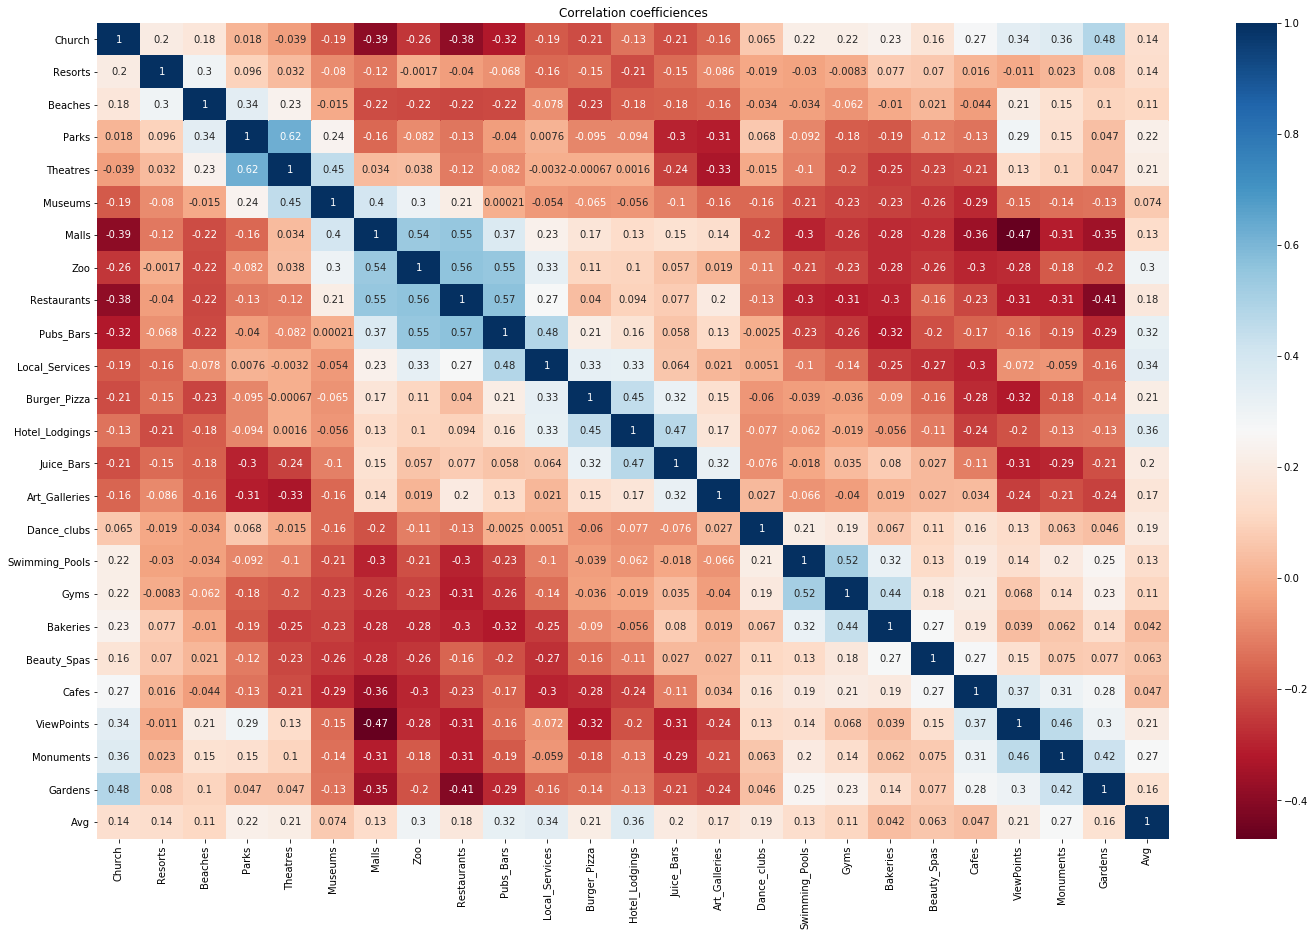

In [16]:
plt.figure(figsize=(24,15))
corr_df = df.corr()
plt.title('Correlation coefficiences')
sns.heatmap(corr_df, annot=True, cmap='RdBu')

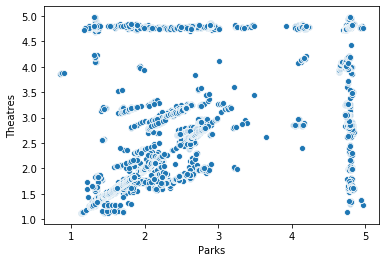

In [17]:
sns.scatterplot(x='Parks', y='Theatres', data=df)

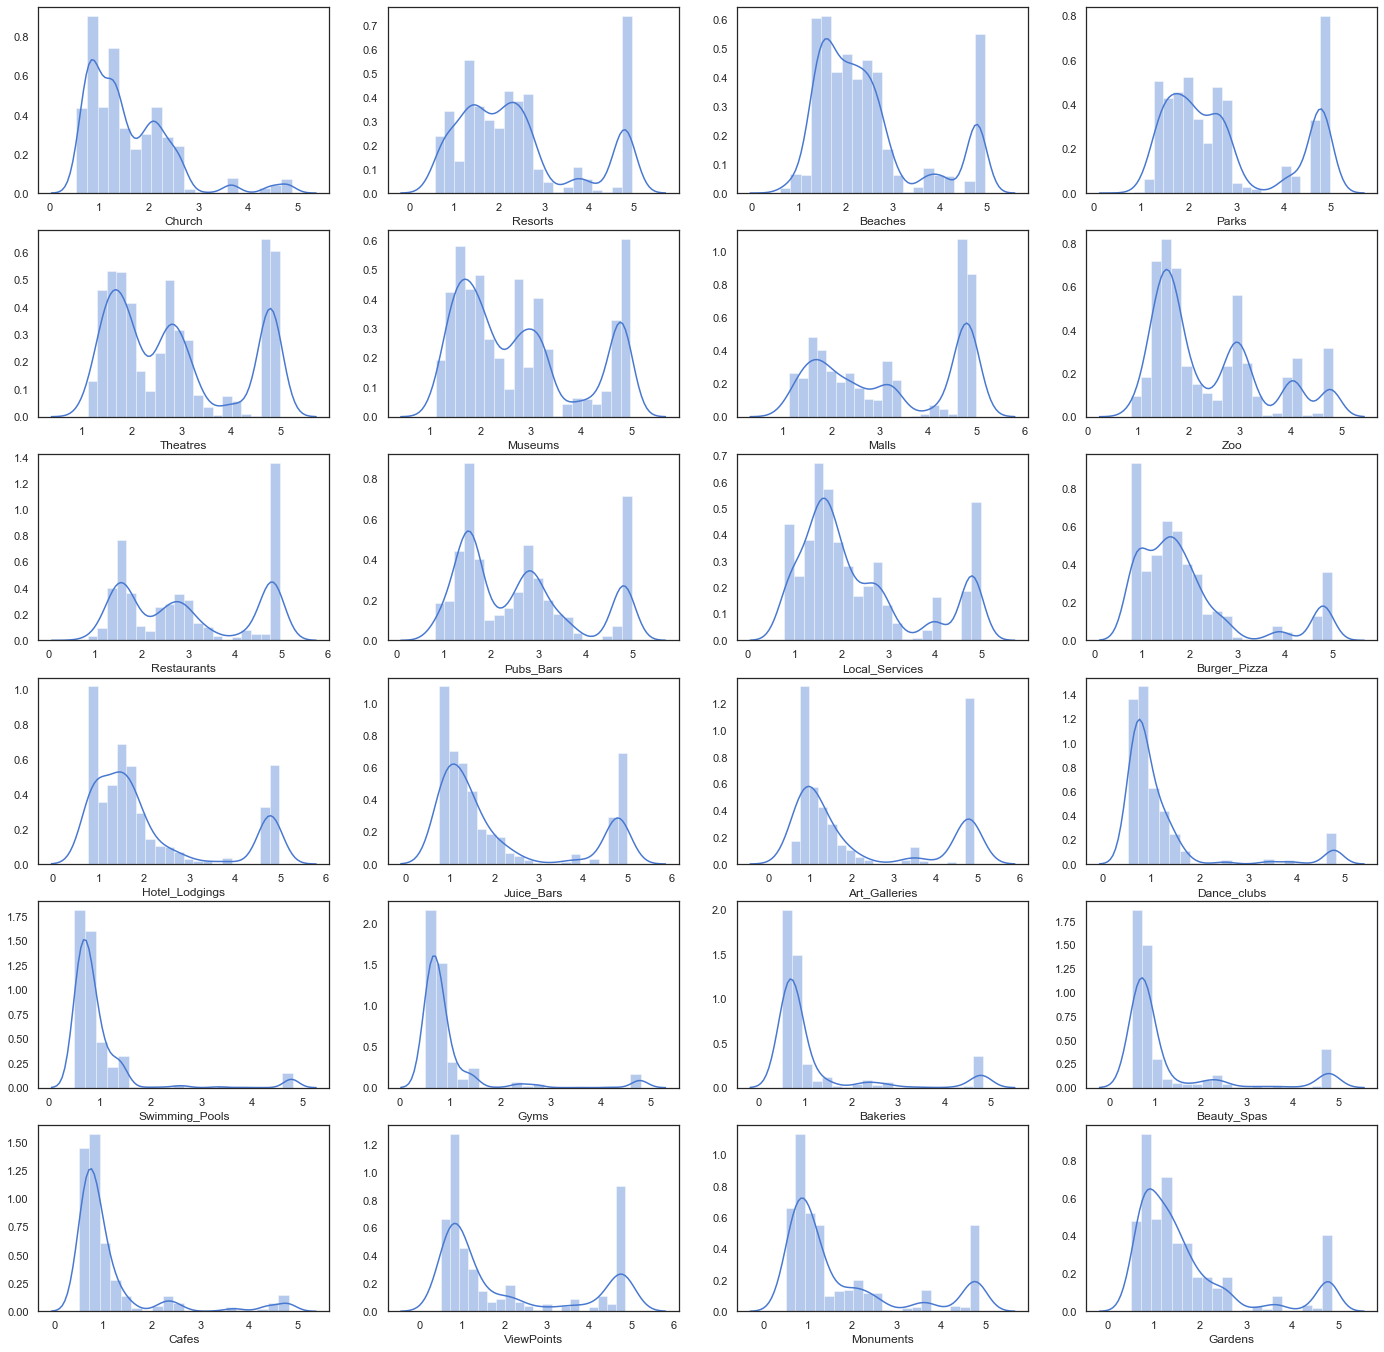

In [18]:
plt.figure(figsize=(24, 24))
index = 1
for col_id in df.columns:
    if col_id != 'UserId' and col_id != 'Avg':
        sns.set(color_codes=True)
        sns.set(style="white", palette="muted")
        plt.subplot(6, 4, index)
        sns.distplot(df[col_id], bins=20)
        index += 1

## Clustering
* Kmeans

In [19]:
from sklearn.cluster import KMeans

x_train = df.drop(['UserId', 'Avg'], axis=1)
model = KMeans(n_clusters=3, random_state=9527)
model.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=9527, tol=0.0001, verbose=0)

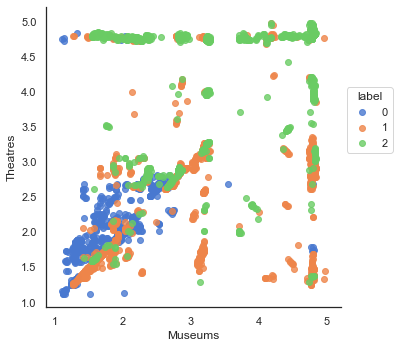

In [20]:
x_train['label'] = model.labels_
facet = sns.lmplot(data=x_train, x='Museums', y='Theatres', hue='label', 
                   fit_reg=False, legend=False)
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)
    

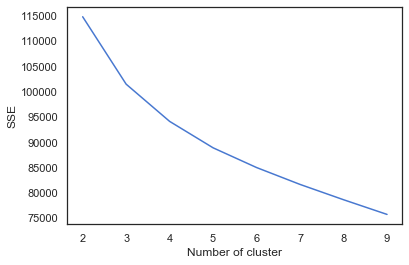

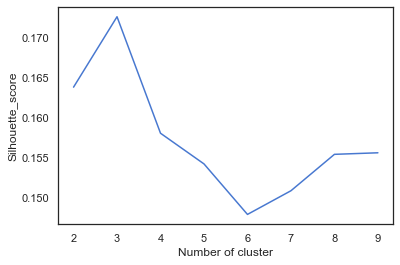

In [21]:
from sklearn.metrics import silhouette_score

sse = {}
sil = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=2020).fit(x_train)
    sse[k] = kmeans.inertia_
    sil[k] = silhouette_score(x_train, kmeans.labels_, metric = 'euclidean')
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

plt.figure()
plt.plot(list(sil.keys()), list(sil.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette_score")
plt.show()

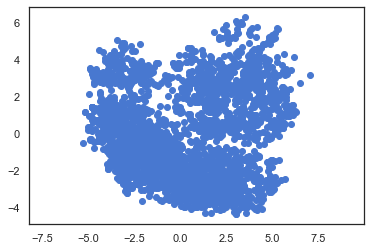

In [22]:
from sklearn.decomposition import PCA

n_components = 2
random_state = 9527

pca = PCA(n_components=n_components, 
          random_state=random_state)

L = pca.fit_transform(x_train)
plt.scatter(L[:, 0], L[:, 1])
plt.axis('equal');

## Clustering
* DBSCAN

In [23]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=4, min_samples=7)
clustering.fit(x_train)
x_train['DBSCAN'] = clustering.labels_

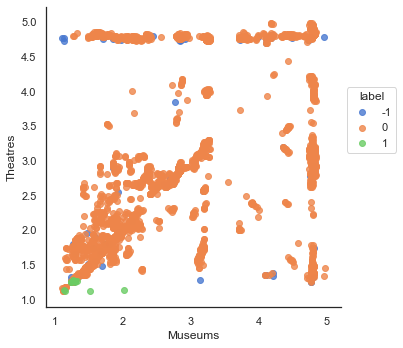

In [24]:
facet = sns.lmplot(data=x_train, x='Museums', y='Theatres', hue='DBSCAN', 
                   fit_reg=False, legend=False)
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)

In [25]:
min_samples = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in min_samples:
    print("min_sample value is " + str(i))
    db = DBSCAN(eps=4, min_samples=i).fit(x_train)
    silhouette_avg = silhouette_score(x_train, db.labels_)
    print("The average silhouette_score is: ", silhouette_avg)

min_sample value is 1
The average silhouette_score is:  -0.2705232146542484
min_sample value is 2
The average silhouette_score is:  -0.042832532078943546
min_sample value is 3
The average silhouette_score is:  -0.014210184882619518
min_sample value is 4
The average silhouette_score is:  -0.006101439569072752
min_sample value is 5
The average silhouette_score is:  0.02949852624907002
min_sample value is 6
The average silhouette_score is:  0.03811298412472564
min_sample value is 7
The average silhouette_score is:  0.08919051703614837
min_sample value is 8
The average silhouette_score is:  0.08273456460414283
min_sample value is 9
The average silhouette_score is:  0.08362975672846087
min_sample value is 10
The average silhouette_score is:  0.06396262079441126
